In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import xarray as xr
import sparse
from itertools import product, combinations
from pathlib import Path
from pprint import pprint
import matplotlib.pyplot as plt
import matplotlib

pd.options.display.max_rows = 500
#pd.options.display.max_columns = 4000

import sys
sys.path.append('../src/')

# import categories as cats
# import constraints

In [2]:
from extended_survey import process_people_df
from census import process_census
from constraints import get_ind_const

from setup_lin_system import setup_ls

from ipf import check_solvable

In [3]:
constraints_ind = get_ind_const()

In [4]:
survey_dir = Path('../data/cuestionario_ampliado/Censo2020_CA_nl_csv/')
personas_path = Path('../data/cuestionario_ampliado/Censo2020_CA_nl_csv/Personas19.CSV')
census_iter_path = Path('../data/census_loc/ITER_19CSV20.csv')
census_resageburb_path = Path('../data/census_ageb_manz/RESAGEBURB_19CSV20.csv')

In [5]:
%%time
personas_cat = process_people_df(personas_path)

CPU times: user 9.29 s, sys: 436 ms, total: 9.73 s
Wall time: 9.73 s


In [6]:
%%time
(
    df_mun, df_mun_min, df_mun_max,
    df_loc, df_loc_min, df_loc_max,
    df_agebs, df_agebs_min, df_agebs_max
) = process_census(census_iter_path, census_resageburb_path)

CPU times: user 10.7 s, sys: 1.2 s, total: 11.9 s
Wall time: 11.9 s


In [293]:
XWC_dict = setup_ls(personas_cat, df_mun, constraints_ind)

0it [00:00, ?it/s]

Abasolo
Filling ...


1it [00:09,  9.11s/it]

Done.
Agualeguas


2it [00:13,  6.16s/it]

Los Aldamas
Filling ...


3it [00:21,  6.94s/it]

Done.
Allende
Filling ...


4it [00:31,  8.17s/it]

Done.
Anáhuac


5it [00:35,  6.74s/it]

Apodaca
Filling ...


6it [00:48,  8.86s/it]

Done.
Aramberri
Filling ...


7it [00:57,  8.97s/it]

Done.
Bustamante
Filling ...


8it [01:05,  8.76s/it]

Done.
Cadereyta Jiménez
Filling ...


9it [01:17,  9.70s/it]

Done.
El Carmen


10it [01:22,  8.23s/it]

Cerralvo
Filling ...


11it [01:32,  8.78s/it]

Done.
Ciénega de Flores
Filling ...


12it [01:42,  9.00s/it]

Done.
China
Filling ...


13it [01:51,  9.27s/it]

Done.
Doctor Arroyo
Filling ...


14it [02:01,  9.30s/it]

Done.
Doctor Coss
Filling ...


15it [02:09,  8.86s/it]

Done.
Doctor González


16it [02:13,  7.42s/it]

Galeana
Filling ...


17it [02:24,  8.46s/it]

Done.
García
Filling ...


18it [02:35,  9.33s/it]

Done.
San Pedro Garza García
Filling ...


19it [02:45,  9.49s/it]

Done.
General Bravo
Filling ...


20it [02:53,  9.15s/it]

Done.
General Escobedo
Filling ...


21it [03:05, 10.08s/it]

Done.
General Terán
Filling ...


22it [03:14,  9.55s/it]

Done.
General Treviño


23it [03:18,  7.85s/it]

General Zaragoza
Filling ...


24it [03:26,  8.12s/it]

Done.
General Zuazua
Filling ...


25it [03:37,  8.97s/it]

Done.
Guadalupe
Filling ...


26it [03:48,  9.60s/it]

Done.
Los Herreras
Filling ...


27it [03:56,  9.14s/it]

Done.
Higueras
Filling ...


28it [04:04,  8.76s/it]

Done.
Hualahuises
Filling ...


29it [04:13,  8.62s/it]

Done.
Iturbide


30it [04:17,  7.24s/it]

Juárez
Filling ...


31it [04:31,  9.34s/it]

Done.
Lampazos de Naranjo
Filling ...


32it [04:39,  8.99s/it]

Done.
Linares
Filling ...


33it [04:52, 10.23s/it]

Done.
Marín
Filling ...


34it [05:01,  9.83s/it]

Done.
Melchor Ocampo


35it [05:05,  8.06s/it]

Mier y Noriega
Filling ...


36it [05:13,  8.11s/it]

Done.
Mina
Filling ...


37it [05:22,  8.21s/it]

Done.
Montemorelos
Filling ...


38it [05:32,  8.83s/it]

Done.
Monterrey
Filling ...


39it [05:45, 10.00s/it]

Done.
Parás
Filling ...


40it [05:52,  9.32s/it]

Done.
Pesquería
Filling ...


41it [06:03,  9.66s/it]

Done.
Los Ramones
Filling ...


42it [06:11,  9.31s/it]

Done.
Rayones


43it [06:15,  7.71s/it]

Sabinas Hidalgo
Filling ...


44it [06:24,  8.06s/it]

Done.
Salinas Victoria
Filling ...


45it [06:34,  8.47s/it]

Done.
San Nicolás de los Garza
Filling ...


46it [06:46,  9.70s/it]

Done.
Hidalgo
Filling ...


47it [06:55,  9.38s/it]

Done.
Santa Catarina
Filling ...


48it [07:06, 10.00s/it]

Done.
Santiago
Filling ...


49it [07:16,  9.80s/it]

Done.
Vallecillo
Filling ...


50it [07:24,  9.23s/it]

Done.
Villaldama
Filling ...


51it [07:32,  8.86s/it]

Done.


In [617]:
conf_muns = []
for mun, XWC in XWC_dict.items():
    X = XWC['X']
    W = XWC['W']
    C = XWC['C']
    if not check_solvable(W.values, C.values):
        conf_muns.append(mun)
conf_muns

['Cerralvo',
 'Ciénega de Flores',
 'China',
 'Guadalupe',
 'Juárez',
 'Linares',
 'Marín',
 'Pesquería',
 'Sabinas Hidalgo',
 'Salinas Victoria']

## Find hidden zero-cells with non-zero constraints/Complete the set of marginals

In [6]:
def get_tables(constraints):
    tables = {}
    
    # Iterate over constraints obtaining list of contingency tables
    for cname, cdict in constraints.items():
        if cname == 'POBTOT': continue
        columns = tuple(sorted(list((cdict.keys()))))
        if 'DIS' in columns: continue
        if columns not in tables:
            tables[columns] = [cname]
        else:
            tables[columns].append(cname)
        
    return tables

tables = get_tables(constraints_ind)

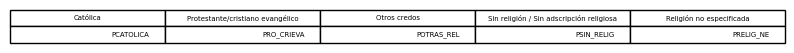

In [69]:
def draw_table_1way(tabkey, table, constraints, df):
    colname = tabkey[0]
    columns = {c: [] for c in df[colname].cat.categories}
    
    for const in table:
        for cval in constraints[const][colname]:
            columns[cval].append(const)
            
    celltext = [[' '.join(x) for x in columns.values()]]
    collabels = list(columns.keys())
    

    fig, ax = plt.subplots(figsize=(2*len(columns), 0.05*len(columns)))     
    ax.set_axis_off() 
    ptable = plt.table(cellText=celltext, colLabels=collabels, loc='center')

    #return fig
    

tname = 'RELIGION'
draw_table_1way((tname,), tables[(tname,)], constraints_ind, personas_cat['Abasolo']);

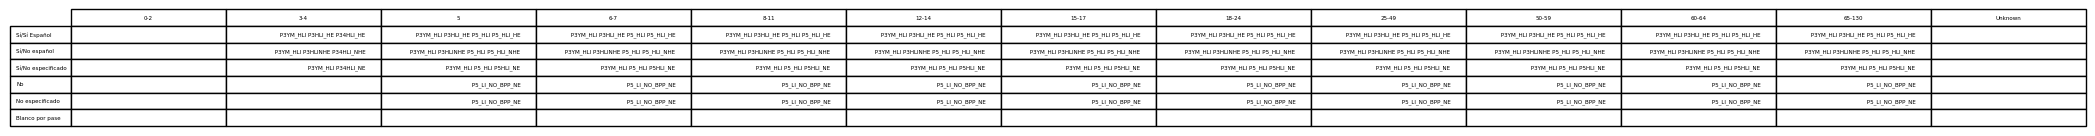

In [103]:
def draw_table_2way(tabkey, table, constraints, df):
    colname = tabkey[0]
    rowname = tabkey[1]
    columns = {c: i for i, c in enumerate(df[colname].cat.categories)}
    rows = {c: i for i, c in enumerate(df[rowname].cat.categories)}
    data = [['']*len(columns) for _ in range(len(rows))]
    
    for const in table:
        for v1, v2 in product(constraints[const][rowname], constraints[const][colname]):
            # create product of constarint values
            data[rows[v1]][columns[v2]] += ' ' + const

    collabels = list(columns.keys())
    rowlabels = list(rows.keys())

    fig, ax = plt.subplots(figsize=(2*len(columns), 2*len(rows)/10))     
    ax.set_axis_off() 
    ptable = plt.table(cellText=data, colLabels=collabels, rowLabels=rowlabels, loc='center')

    #return fig

tname = ('EDAD', 'HLENGUA')
draw_table_2way(tname, tables[tname], constraints_ind, personas_cat['Abasolo'])

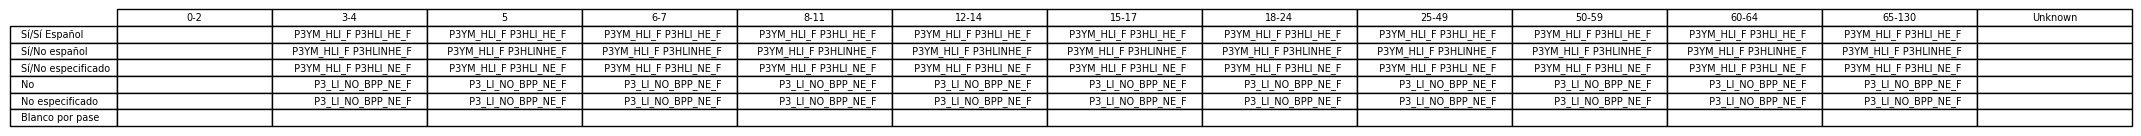

In [102]:
def draw_table_3way(tabkey, table, constraints, df):
    # Split 3way table into two 2way tables by SEXO
    table_F = [v for v in table if v.endswith('F')]
    table_M = [v for v in table if v.endswith('M')]
    tabkey = [v for v in tabkey if v != 'SEXO']
    assert len(tabkey) == 2
    
    draw_table_2way(tabkey, table_F, constraints, df)

tname = ('EDAD', 'HLENGUA', 'SEXO')
draw_table_3way(tname, tables[tname], constraints_ind, personas_cat['Abasolo'])

In [7]:
def find_conflicts(W, C):
    WC = W.copy()
    WC['C'] = C
    
    # Find first conflicting vector
    qw, rw = np.linalg.qr(W.T)
    w_dependent = np.where(np.abs(np.diag(rw)) < 1e-10)[0]
    
    qwc, rwc = np.linalg.qr(WC.T)
    wc_dependent = np.where(np.abs(np.diag(rwc)) < 1e-10)[0]
    
    # assert len(wc_dependent) == len(w_dependent) - 1, (len(wc_dependent), len(w_dependent))
    
    idx = [i for i in w_dependent if i not in wc_dependent][0]
    wname = W.iloc[idx].name
    
    # Start with conflicting vector and add one by one until conflict occues
    dep_list = [wname]

    while np.linalg.matrix_rank(W.loc[dep_list]) == np.linalg.matrix_rank(WC.loc[dep_list]):
        pool = list(W.index.drop(dep_list))
        const = dep_list.copy()
        
        while pool:
            const.append(pool.pop())
            if np.linalg.matrix_rank(W.loc[const]) != np.linalg.matrix_rank(WC.loc[const]):
                dep_list.append(const[-1])
                break
        
        
    return dep_list
    

In [484]:
dups = {}
for mun in conf_muns:
    X = XWC_dict[mun]['X']
    W = XWC_dict[mun]['W']
    C = XWC_dict[mun]['C']
    
    WC = W.copy()
    WC['C'] = C
    
    dups_l = []
    
    for n, g in W.reset_index().groupby(list(W.columns)):
        if len(g) > 1:
            dups_l.append(g['index'].values)
    #cols = np.concatenate(dups_l)
    dups[mun] = dups_l

In [485]:
dups

{'Cerralvo': [array(['P_UNK_F', 'P_UNK_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M',
         'P5_HLI_NHE', 'P3HLI_NE_F', 'P3HLI_NE_M', 'P5HLI_NE', 'P34HLI_NHE',
         'P34HLI_NE', 'P12YM_BPP_NE', 'PRELIG_NE'], dtype=object),
  array(['P3YM_HLI_F', 'P3HLI_HE_F', 'P34HLI_HE'], dtype=object),
  array(['P3YM_HLI_M', 'P3HLI_HE_M', 'P5_HLI', 'P5_HLI_HE'], dtype=object),
  array(['P3YM_HLI', 'P3HLI_HE'], dtype=object)],
 'Ciénega de Flores': [array(['P3HLINHE_F', 'P34HLI_NHE'], dtype=object),
  array(['P3HLINHE_M', 'P5_HLI_NHE'], dtype=object)],
 'China': [array(['P_UNK_F', 'P_UNK_M', 'P3HLINHE', 'P3HLINHE_F', 'P3HLINHE_M',
         'P5_HLI_NHE', 'P3HLI_NE_F', 'P3HLI_NE_M', 'P5HLI_NE', 'P34HLI_NHE',
         'P34HLI_NE', 'P12YM_BPP_NE'], dtype=object),
  array(['P3YM_HLI_F', 'P3HLI_HE_F', 'P5_HLI', 'P5_HLI_HE'], dtype=object),
  array(['P3YM_HLI_M', 'P3HLI_HE_M', 'P34HLI_HE'], dtype=object),
  array(['P3YM_HLI', 'P3HLI_HE'], dtype=object)],
 'Guadalupe': [array(['P3HLINHE_M', 'P5_HLI_NHE'],

In [614]:
mun = 'Santiago'
X = XWC_dict[mun]['X']
W = XWC_dict[mun]['W']
C = XWC_dict[mun]['C']

In [618]:
C

POBTOT                 3573.0
POBFEM                 1786.0
POBMAS                 1787.0
P_0A2                   137.0
P_0A2_F                  66.0
P_0A2_M                  71.0
P_3YMAS                3433.0
P_3YMAS_M              1715.0
P_3YMAS_F              1718.0
P_5YMAS                3330.0
P_5YMAS_M              1666.0
P_5YMAS_F              1664.0
P_12YMAS               3008.0
P_12YMAS_M             1481.0
P_12YMAS_F             1527.0
P_15YMAS               2839.0
P_15YMAS_M             1396.0
P_15YMAS_F             1443.0
P_18YMAS               2667.0
P_18YMAS_M             1319.0
P_18YMAS_F             1348.0
P_3A5                   154.0
P_3A5_M                  82.0
P_3A5_F                  72.0
P_6A11                  271.0
P_6A11_M                152.0
P_6A11_F                119.0
P_8A14                  347.0
P_8A14_M                186.0
P_8A14_F                161.0
P_12A14                 169.0
P_12A14_M                85.0
P_12A14_F                84.0
P_15A17   

In [593]:
from setup_lin_system import find_conf_const

In [615]:
conf_const = find_conf_const(W, C)
conf_const

[]

In [597]:
C_conf = C[conf_const]
C_conf

P3YM_HLI      6589.0
P3HLINHE        23.0
P3HLI_HE      6494.0
P3HLINHE_F      14.0
P5HLI_NE        71.0
P34HLI_HE       17.0
P5_HLI        6571.0
P3YM_HLI_F    3012.0
P3HLI_HE_F    2960.0
P34HLI_NE        1.0
P5_HLI_HE     6477.0
Name: Pesquería, dtype: float64

In [ ]:
# We need to fill above constraints and their associated independent vectors using positive least squares

In [598]:
X_f = fill_zero_nn(X, C_conf, constraints_ind)

In [599]:
W_f = get_W(X_f, constraints_ind)

In [600]:
C_f = C[W_f.index]

In [616]:
check_solvable(W_f, C_f)

True

In [602]:
len(X_f)

6463

In [604]:
len(X)

6458

In [613]:
for k, v in XWC_dict.items():
    print(k, len(v['X']))

Abasolo 2665
Agualeguas 3037
Los Aldamas 1275
Allende 4314
Anáhuac 4063
Apodaca 15952
Aramberri 3816
Bustamante 3272
Cadereyta Jiménez 5787
El Carmen 12728
Cerralvo 2880
Ciénega de Flores 8157
China 2824
Doctor Arroyo 5370
Doctor Coss 1219
Doctor González 2951
Galeana 5531
García 16134
San Pedro Garza García 4490
General Bravo 2580
General Escobedo 13851
General Terán 4005
General Treviño 1666
General Zaragoza 2872
General Zuazua 8138
Guadalupe 15287
Los Herreras 1785
Higueras 1318
Hualahuises 3071
Iturbide 2743
Juárez 21256
Lampazos de Naranjo 2611
Linares 6530
Marín 2482
Melchor Ocampo 1310
Mier y Noriega 3200
Mina 3006
Montemorelos 4629
Monterrey 16344
Parás 847
Pesquería 6458
Los Ramones 2810
Rayones 2102
Sabinas Hidalgo 4611
Salinas Victoria 5379
San Nicolás de los Garza 15428
Hidalgo 4161
Santa Catarina 17857
Santiago 4282
Vallecillo 1450
Villaldama 2263


In [ ]:
XW

In [275]:
X_f.iloc[-4:]

,MUN,CLAVIVP,SEXO,EDAD,ENT_PAIS_NAC,PARENTESCO,NACIONALIDAD,SERSALUD,AFRODES,DHSERSAL,...,"MED_TRASLADO_TRAB_Camión, autobús, combi, colectivo","MED_TRASLADO_TRAB_Metro, tren ligero, tren suburbano",MED_TRASLADO_TRAB_Metrobús (autobús en carril confinado),MED_TRASLADO_TRAB_Motocicleta o motoneta,MED_TRASLADO_TRAB_No especificado,MED_TRASLADO_TRAB_Otro,MED_TRASLADO_TRAB_Taxi (App Internet),"MED_TRASLADO_TRAB_Taxi (sitio, calle, otro)",MED_TRASLADO_TRAB_Transporte escolar,FACTOR
4282,Santiago,No especificado de vivienda particular,F,50-59,EstaEnt,Esposa(o),Sí,IMSS,No,1000000000,...,0,0,0,0,0,0,0,0,0,10.0
4283,Santiago,No especificado de vivienda particular,F,60-64,EstaEnt,Esposa(o),Sí,IMSS,No,1000000000,...,0,0,0,0,0,0,0,0,0,10.0
4284,Santiago,No especificado de vivienda particular,F,65-130,EstaEnt,Jefa(e),Sí,IMSS,No,1000000000,...,0,0,0,0,0,0,0,0,0,10.0
4285,Santiago,No especificado de vivienda particular,F,65-130,EstaEnt,Jefa(e),Sí,IMSS,No,1000000000,...,0,0,0,0,0,0,0,0,0,10.0


In [262]:
# 1. Find all attribute combinations not in X
# Iterate over constraints
for const_name in consts:
    # Get the dictionary of col: valus for the constraint
    const_dict = constraints_ind[const_name].copy()
    
    # Find all constrined attribute combinations
    columns = list(const_dict.keys())
    attr_combs = list(product(*const_dict.values()))
    
    # Filter those already in X
    attr_new = []
    attr_old = []
    for attr in attr_combs:
        qry_str = ' & '.join([f'{col} == "{val}"' for col, val in zip(columns, attr)])
        if X.query(qry_str).empty:
            attr_new.append(attr)
        else:
            attr_old.append(attr)
    
    print(pd.DataFrame(attr_old, columns=columns))

  EDAD        HLENGUA
0    5  Sí/No español
  EDAD        HLENGUA
0    5  Sí/No español
  SEXO   EDAD             HLENGUA
0    F  18-24  Sí/No especificado
1    F  25-49  Sí/No especificado
    EDAD             HLENGUA
0  18-24  Sí/No especificado
1  25-49  Sí/No especificado
  SEXO EDAD             HLENGUA
0    M  3-4  Sí/No especificado
  EDAD             HLENGUA
0  3-4  Sí/No especificado


In [32]:
import scipy.linalg as spl

In [56]:
W_inv = spl.pinv(W)
X_sol = W_inv @ C.values

In [57]:
(W.values @ X_sol - C.values).astype(int)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [58]:
len(personas_cat['Apodaca'])

18513

In [59]:
len(X)

16423

### OD Survey

In [96]:
od_df = pd.read_csv('../data/OD_Survey/datos_limpios_tiempos.csv', low_memory=False)

In [101]:
od_df.head()

,ID-HOGAR,H-P,H-P-V,Latitud,Longitud,FechaHoraEnc,NumVisita,TipoEnc,RealizoEnc,Encuestador,Supervisor,Cod_MunDomicilio,ColDom,CalleDom,NExtDom,NIntDom,RefDom,CPDom,Punto_zona,Cod_EdoDomicilio,LineaTelef,VHAuto,VHMoto,VHPickup,VHCamion,VHBici,VHPatineta,VHPatines,VHScooter,VHOtro,CHBaños,CHDormitorios,Internet,Hab14masTrabajo,HabitantesTotal,HbitantesMayor6,HbitantesMenor5,TodosEstan,NunHabitante,Género,Edad,RelaciónHogar,RelaciónHogar_O,Discapacidad,Discapacidad_O,Estudios,Estudios_O,Ocupacion,Ocupacion_O,SectorEconom,SectorEconom_O,ViajeAyer,Num_Viaje,Lugar_Or,Cod_MunOri,ColOri,RefOri,CalleOri,Esquina_Ori,Cruce_Ori,OtroEstadoOri,OtroEstadoOri_O,CodOri,Cod_EdoOri,Macrozona Origen,ZonaOri,Hora Inicio V,LugarDest,Cod_MunDest,ColDest,RefDest,CalleDest,Esquina_Dest,Cruce_Dest,OtroEstadoDest,OtroEstadoDest_O,CodDest,Cod_EdoDest,Macrozona Destino,ZonaDest,Hora Término Viaje,Cod_IDEdoDest,Cod_IDMunDest,Cod_IDLocDest,Cod_LocDest,Cod_IDColDest,Cod_ColDest,Cod_IDRefDest,Cod_RefDest,Tiempo Tot de Viaje,Motivo,Motivo_O,M1_TipoTransp,M1_Transp_O,M1Tpo_Caminata,M1N_Ruta,M1_HHTpoParada,M1_MMTpoParada,M1_HHTpoAbordo,M1_HHTpoAbordo_O,M1_MMTpoAbordo,M1_Pago,M2_Transp,M2_Transp_O,M2_TipoTransp,M2Tpo_Caminata,M2N_Ruta,M2_HHTpoParada,M2_MMTpoParada,M2_TpoTranspordo,M2_HHTpoAbordo,M2_HHTpoAbordo_O,M2_MMTpoAbordo,M2_Pago,M3_Transp,M3_Transp_O,M3_TipoTransp,M3Tpo_Caminata,M3N_Ruta,M3_HHTpoParada,M3_MMTpoParada,M3_TpoTranspordo,M3_HHTpoAbordo,M3_HHTpoAbordo_O,M3_MMTpoAbordo,M3_Pago,M4_Transp,M4_Transp_O,M4_TipoTransp,M4Tpo_Caminata,M4N_Ruta,M4_HHTpoParada,M4_MMTpoParada,M4_TpoTranspordo,M4_HHTpoAbordo,M4_HHTpoAbordo_O,M4_MMTpoAbordo,M4_Pago,M5_Transp,M5_Transp_O,M5_TipoTransp,M5Tpo_Caminata,M5N_Ruta,M5_HHTpoParada,M5_MMTpoParada,M5_TpoTranspordo,M5_HHTpoAbordo,M5_HHTpoAbordo_O,M5_MMTpoAbordo,M5_Pago,M6_Transp,M6_Transp_O,M6_TipoTransp,M6Tpo_Caminata,M6N_Ruta,M6_HHTpoParada,M6_MMTpoParada,M6_TpoTranspordo,M6_HHTpoAbordo,M6_HHTpoAbordo_O,M6_MMTpoAbordo,M6_Pago,M7_Transp,M7_Transp_O,M7_TipoTransp,M7Tpo_Caminata,M7N_Ruta,M7_HHTpoParada,M7_MMTpoParada,M7_TpoTranspordo,M7_HHTpoAbordo,M7_HHTpoAbordo_O,M7_MMTpoAbordo,M7_Pago,M8_Transp,M8_Transp_O,M8_TipoTransp,M8Tpo_Caminata,M8N_Ruta,M8_HHTpoParada,M8_MMTpoParada,M8_TpoTranspordo,M8_HHTpoAbordo,M8_HHTpoAbordo_O,M8_MMTpoAbordo,M8_Pago,TipoEstacionamiento,TpoBusqueda,TpoEstacionadoHH,TpoEstacionadoMM,CostoEstacionamiento,Obs_Encuestador,Obs_ENCUESTA,FE,Modo Agrupado,motivos,genero,estudios,disc,origen,Tiempo,tiempo_s,tiempo_m,tiempo_h
0,23853a-20,23853a-20/2,23853a-20/2-2,25.765088,-100.406374,2019-09-24T00:00:00Z,Visita 1,HABITANTE,NaN,Lucia Hernández Mondragón,Patricia Baena,Monterrey,Barrio Estrella Elit,lucero,112,NaN,NaN,64102.0,86,Nuevo Leon,Si,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,Si,4.0,4.0,4.0,NaN,NaN,2,Mujer,40,Madre/Esposa,NaN,Ninguna,NaN,Sin Instrucción,NaN,Ama de casa,NaN,Otro,NaN,Sí,2,El DESTINO de viaje inmediato anterior,Monterrey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10358.0,Nuevo Leon,19.0,76,1899-12-31T18:50:00Z,El HOGAR,Monterrey,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2249.0,Nuevo Leon,17.0,86,1899-12-31T19:00:00Z,19.0,39.0,NaN,NaN,34979,BARRIO ESTRELLA,NaN,NaN,1899-12-31T00:10:00Z,regreso a casa,NaN,Vehículo Particular,NaN,0.0,NaN,0.0,0,0,0.0,10,NaN,No utilizó otro medio de transporte,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,NaN,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,"Propio (Casa, oficina)",NaN,11.0,NaN,NaN,NaN,NaN,1282.883061,automovil,3,F,Bajo,No,NA+NA,NaN,600,10,0.166667
1,23853a-20,23853a-20/4,23853a-20/4-2,25.765088,-100.406374,2019-09-24T00:00:00Z,Visita 1,VIAJE,NaN,Lucia Hernández Mondragón,Patricia Baena,Monterrey,Barrio Estrella Elit,lucero,112,NaN,NaN,64102.0,86,Nuevo Leon,Si,2.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,2.0,Si,4.0,4.0,4.0,NaN,NaN,4,Hombre,

### Determining household structure

In [147]:
# Map people to households
viv_per_dict = {}
for id_viv, group in personas.groupby('ID_VIV'):
    viv_per_dict[id_viv] = group[['ID_PERSONA', 'NUMPER', 'SEXO', 'EDAD', 'PARENTESCO', 'IDENT_MADRE', 'IDENT_PADRE']]

In [148]:
viv_per_dict[190010000001].sort_values('NUMPER')

,ID_PERSONA,NUMPER,SEXO,EDAD,PARENTESCO,IDENT_MADRE,IDENT_PADRE
4,19001000000100005,1,3,30,101,96,96
1,19001000000100002,2,1,36,201,96,96
0,19001000000100001,3,3,9,301,1,96
3,19001000000100004,4,3,6,301,1,96
2,19001000000100003,5,1,1,301,1,2


### Seed from group counts

In [ ]:
# Seed for whole met area

In [ ]:
# Seed per municipality

In [ ]:
# Comparing seeds from municipality and whole area

### Seed using bayesian networks

### Comparing both seeds

# Reconstrucción de microdatos para el censo 2020, nivel AGEB

El objetivo es obtener una base de microdatos para cada AGEB del censo 2020 consistente con los tabulados oficiales.
Para tal efecto, vamos a probar diferentes metodologías, comenzando con una estrategia de reconstrucción utilizando métodos de programación lineal.

Para tener una idea clara de la implementación, tomemos una AGEB específica de la zona metropolitana de Monterrey.

A nivel municipio o demarcación territorial, localidad y AGEB, cualquier indicador con menos de tres unidades aparece con asterisco
a excepción de las variables Población total (POBTOT), Total de viviendas (VIVTOT) y Total de viviendas habitadas (TVIVHAB).

Para comenzar vamos a restringir nuestro objetivos a dos variables: edad y sexo. Usemos una AGEB sin datos faltantes, más adelante ajustaremos la implementación para contemplar los datos redactados (*).

Porbaremos con dos AGEBs,  una será la de menor población con datos columnos para las columnas que se refieren a población y sexo, la segunda la de mayor población.

Las columnas de población en la tabla de microdatos serán discretizadas en el menor número intervalos compatibles con las categorías del censo que puedan aprovechar las restricciones.
La ventaja de no usar una única columna de edad con valor entero es la disminución de tamaño del espacio de soluciones.
Imputar una edad específica puede hacerse en una etapa de procesamiento posterior.
Para no contar dos veces soluciones que unicamente difieren en el ordenamiento de las filas, agregaremos restricciones de ordenamiento para los valores de edad.

Las categorias posibles de obtener del censo son las siguientes y las codificamos como enteros:
- 0-2: 0
- 3-4: 1
- 5: 2
- 6-7: 3
- 8-11: 4
- 12-14: 5
- 15-17: 6
- 18-24: 7
- 25-59: 8
- 60-64: 9
- 65-130: 10

Tener esta codificación en mente es importante al momento de definir las restricciones.

Al momento de crear los objetivos, usaremos un arreglo de variables en 2D, la tabla de microdatos.
Esto debe ser compatible con OR-Tools, por lo que será implementado como una lista de listas.
Es este problema restringido a edad y sexo, necesitamos dos columnas: SEXO y EDAD.

In [40]:
def series_to_dict(series):
    d = series.to_dict()
    keys = d.keys()
    
    vals = d.values()
    vals = [int(v) 
            if isinstance(v, float) and not np.isnan(v)
            else v for v in d.values() ]
    
    d = {k: v for k,v in zip(keys, vals)}
    
    return d

## Codificando directamente la tabla de contingencia

In [43]:
from ortools.sat.python import cp_model
from itertools import product

In [44]:
class VarArraySolutionPrinter(cp_model.CpSolverSolutionCallback):
    """Print intermediate solutions."""

    def __init__(self, variables):
        cp_model.CpSolverSolutionCallback.__init__(self)
        self.__variables = variables
        self.__solution_count = 0

    def on_solution_callback(self):
        self.__solution_count += 1
        #for v in self.__variables:
        #    print('%s=%i' % (v, self.Value(v)), end=' ')
        #print()

    def solution_count(self):
        return self.__solution_count

In [171]:
def create_variables(model, dimensions, N):
    x = {}
    for var_id in product(*dimensions.values()):
        x[var_id] = model.NewIntVar(0, N, f'{var_id}')

    return x

In [173]:
def add_constraint(model, ageb, dimensions, variables, c_name, c_dict, verbose=False):
    assert c_name in ageb.keys()
    
    for k, v in c_dict.items():
        assert k in dimensions.keys()
        for vv in v:
            assert vv in dimensions[k]
    
    # Replace classes with classes involved in the constraint only
    c_dims = dimensions.copy()
    for d in c_dims.keys():
        if d in c_dict.keys():
            c_dims[d] = c_dict[d]
    
    # Find all variables involved in the constraints
    c_vars = []
    for var_id in product(*c_dims.values()):
        c_vars.append(variables[var_id])
    
    if verbose:
        print(' + '.join([v.Name() for v in c_vars]) + f' = {c_name}')
    
    model.Add(sum(c_vars) == ageb[c_name])

In [174]:
model = cp_model.CpModel()

variables = create_variables(model, dimensions, ageb['POBTOT'])

for c_name, c_dict in constraints.items():
    add_constraint(model, ageb, dimensions, variables, c_name, c_dict, verbose=False)
    
solver = cp_model.CpSolver()
solution_printer = VarArraySolutionPrinter(list(x.values()))
solver.parameters.enumerate_all_solutions = True

status = solver.Solve(model, solution_printer)
print(f'Found {solution_printer.solution_count()} solutions. Status: {status}')

Found 613872 solutions. Status: 4
